# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Ilham Farras Adnawan
- Email: farrasadnawan20@gmail.com
- Id Dicoding: adnawann

## Menentukan Pertanyaan Bisnis


- Bagaimana perbandingan jumlah penyewa sepeda antara tipe pengguna casual dan pengguna registered?
- Bagaimana trend penyewaan sepeda dalam 2 tahun terakhir?
- Bagaimana pola penggunaan layanan penyewaan sepeda berdasarkan hari dalam satu minggu?



## Menyaipkan semua library yang dibutuhkan

In [1]:
# memanggil semua library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
from google.colab import files # import file dari drive local
uploaded = files.upload()

Saving day.csv to day.csv
Saving hour.csv to hour.csv


In [3]:
day_df = pd.read_csv('day.csv') #  memuat tabel day menjadi sebuah DataFrame
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df = pd.read_csv('hour.csv') #  memuat tabel hour menjadi sebuah DataFrame
hour_df .head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [5]:
day_df.info() # memeriksa tipe data dari tiap kolom yang terdapat dalam day_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
day_df.isna().sum() # melakukan cek jika ada missing values

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ada missing value pada day_df

In [7]:
print("Duplicated data: ", day_df.duplicated().sum()) # memeriksa jika ada duplikasi data

Duplicated data:  0


In [8]:
day_df.describe() # memeriksa parameter statistik dari kolom numerik yang terdapat dalam day_df

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
hour_df.info() # memeriksa tipe data dari tiap kolom yang terdapat dalam hour_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
hour_df.isna().sum() # melakukan cek jika ada missing values

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ada missing value pada hour_df

In [11]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum()) # memeriksa jika ada duplikasi data

Jumlah duplikasi:  0


In [12]:
hour_df.describe() # memeriksa parameter statistik dari kolom numerik yang terdapat dalam hour_df

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [13]:
# mengubah beberapa nama kolom menjadi dateday, year, month, weather, dan count
day_df.rename(
    columns={
        "dteday": "dateday",
        "yr": "year",
        "mnth": "month",
        "weathersit": "weather",
        "cnt": "count",
    },
    inplace=True,
)

day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [14]:
# mengubah tipe data kolom dteday yang sebelum bertipe object menjadi datetime pada day_df
day_df["dateday"] = pd.to_datetime(day_df["dateday"])

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dateday     731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   year        731 non-null    int64         
 4   month       731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weather     731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  count       731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [15]:
# mengubah tipe data kolom dteday yang sebelum bertipe object menjadi datetime pada hour_df
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
# mengubah tipe data kolom hum yang sebelumnya bertipe float menjadi integer pada hour_df
hour_df["hum"] = hour_df["hum"].astype("int64")

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  int64         
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [16]:
# mengubah nama kolom weekdays, month, dan year
day_df["weekday"] = day_df["dateday"].dt.day_name()

day_df["month"] = day_df["dateday"].dt.month_name()

day_df["year"] = day_df["dateday"].dt.year

day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,2011,January,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,2011,January,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,2011,January,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,2011,January,0,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,2011,January,0,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [35]:
# menghapus kolom yang tidak penting
day_df.drop(labels="instant", axis=1, inplace=True)

day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,2011-01-01,1,2011,January,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,2011,January,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,2011,January,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,2011,January,0,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,2011,January,0,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [36]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dateday     731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   year        731 non-null    int64         
 3   month       731 non-null    object        
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    object        
 6   workingday  731 non-null    int64         
 7   weather     731 non-null    int64         
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  count       731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(8), object(2)
memory usage: 85.8+ 

## Exploratory Data Analysis (EDA)

In [44]:
day_df.describe(include="all", datetime_is_numeric=True) # melihat rangkuman parameter statistik dari day_df

,dateday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
count,731,731.000000,731.000000,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,NaN,12,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,January,NaN,Saturday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,62,NaN,105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-01 00:00:00,2.496580,2011.500684,NaN,0.028728,NaN,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,1.000000,2011.000000,NaN,0.000000,NaN,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,2.000000,2011.000000,NaN,0.000000,NaN,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,3.000000,2012.000000,NaN,0.000000,NaN,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,3.000000,2012.000000,NaN,0.000000,NaN,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,4.000000,2012.000000,NaN,1.000000,NaN,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [45]:
hour_df.describe(include="all", datetime_is_numeric=True) # melihat rangkuman parameter statistik dari hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.015536,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.000000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.000000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.000000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.123675,0.122340,49.305030,151.357286,181.387599


Eksplorasi Data day_df pengguna sepeda berdasarkan tipe penggunanya

In [19]:
day_df[["casual", "registered"]].describe().style.format("{:.0f}")

,casual,registered
count,731,731
mean,848,3656
std,687,1560
min,2,20
25%,316,2497
50%,713,3662
75%,1096,4776
max,3410,6946


In [20]:
users_by_type = day_df[["casual", "registered"]].sum()

users_by_type

casual         620017
registered    2672662
dtype: int64

Eksplorasi Data day_df pengguna sepeda berdasarkan tahun

In [21]:
users_by_year = day_df.groupby(by="year").agg(
    {
        "casual": "sum",
        "registered": "sum",
        "count": "sum",
    }
)

users_by_year.style.format("{:.0f}")

,casual,registered,count
year,,,
2011,247252,995851,1243103
2012,372765,1676811,2049576


Eksplorasi Data day_df pengguna sepeda berdasarkan bulan

In [22]:
users_by_month = day_df.groupby(by="month").agg(
    {
        "casual": "sum",
        "registered": "sum",
        "count": "sum",
    }
)

users_by_month.style.format("{:.0f}")
users_by_month.sort_values(by=("count"), ascending=False)

,casual,registered,count
month,,,
August,72039,279155,351194
June,73906,272436,346342
September,70323,275668,345991
July,78157,266791,344948
May,75285,256401,331686
October,59760,262592,322352
April,60802,208292,269094
November,36603,218228,254831
March,44444,184476,228920


Bulan dimana jumlah sepeda sering disewa adalah Bulan Agustus

Bulan dimana jumlah sepeda jarang disewa adalah Bulan Januari

Eksplorasi Data day_df pengguna sepeda berdasarkan hari

In [23]:
users_by_weekday = day_df.groupby(by="weekday").agg(
    {
        "casual": "sum",
        "registered": "sum",
        "count": "sum",
    }
)

users_by_weekday.style.format("{:.0f}")
users_by_weekday.sort_values(by=("count"), ascending=False)

,casual,registered,count
weekday,,,
Friday,78238,409552,487790
Thursday,61460,423935,485395
Saturday,153852,323955,477807
Wednesday,57319,415729,473048
Tuesday,57843,411266,469109
Monday,70784,384719,455503
Sunday,140521,303506,444027


Hari dimana sepeda sering disewa adalah Hari Jumat

Hari dimana sepeda jarang disewa adalah Hari Minggu

## Visualization & Explanatory Analysis

### 1. Bagaimana perbandingan jumlah penyewa sepeda antara tipe pengguna casual dan pengguna registered?

In [24]:
users_by_type = users_by_type.reset_index()
users_by_type = users_by_type.rename(columns={"index": "type", 0: "total"})

users_by_type

,type,total
0,casual,620017
1,registered,2672662


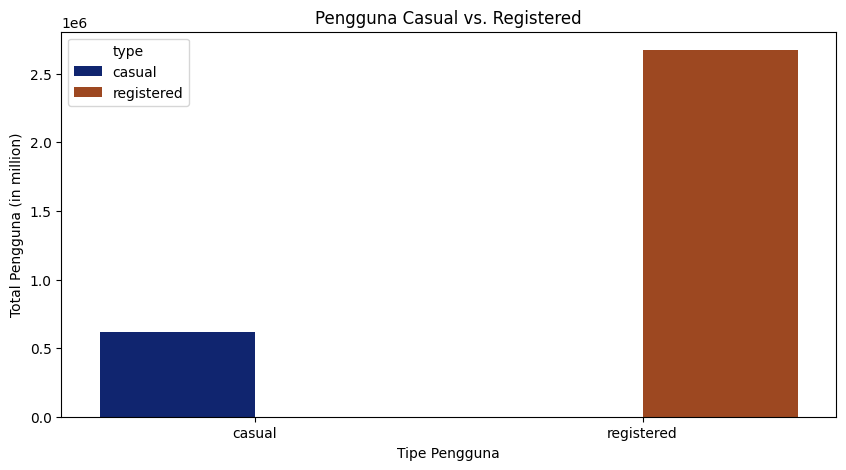

In [25]:
plt.figure(figsize=(10, 5))

sns.barplot(
    x="type",
    y="total",
    hue="type",
    data=users_by_type,
    palette="dark",
)
plt.title("Pengguna Casual vs. Registered")
plt.xlabel("Tipe Pengguna")
plt.ylabel("Total Pengguna (in million)")
plt.show()

Berdasarkan visualisasi di atas, terlihat bahwa perbandingan total pengguna bike-sharing dengan tipe `registered` **jauh lebih tinggi** dibandingkan dengan tipe `casual`.

### 2. Bagaimana trend penyewaan sepeda dalam 2 tahun terakhir?

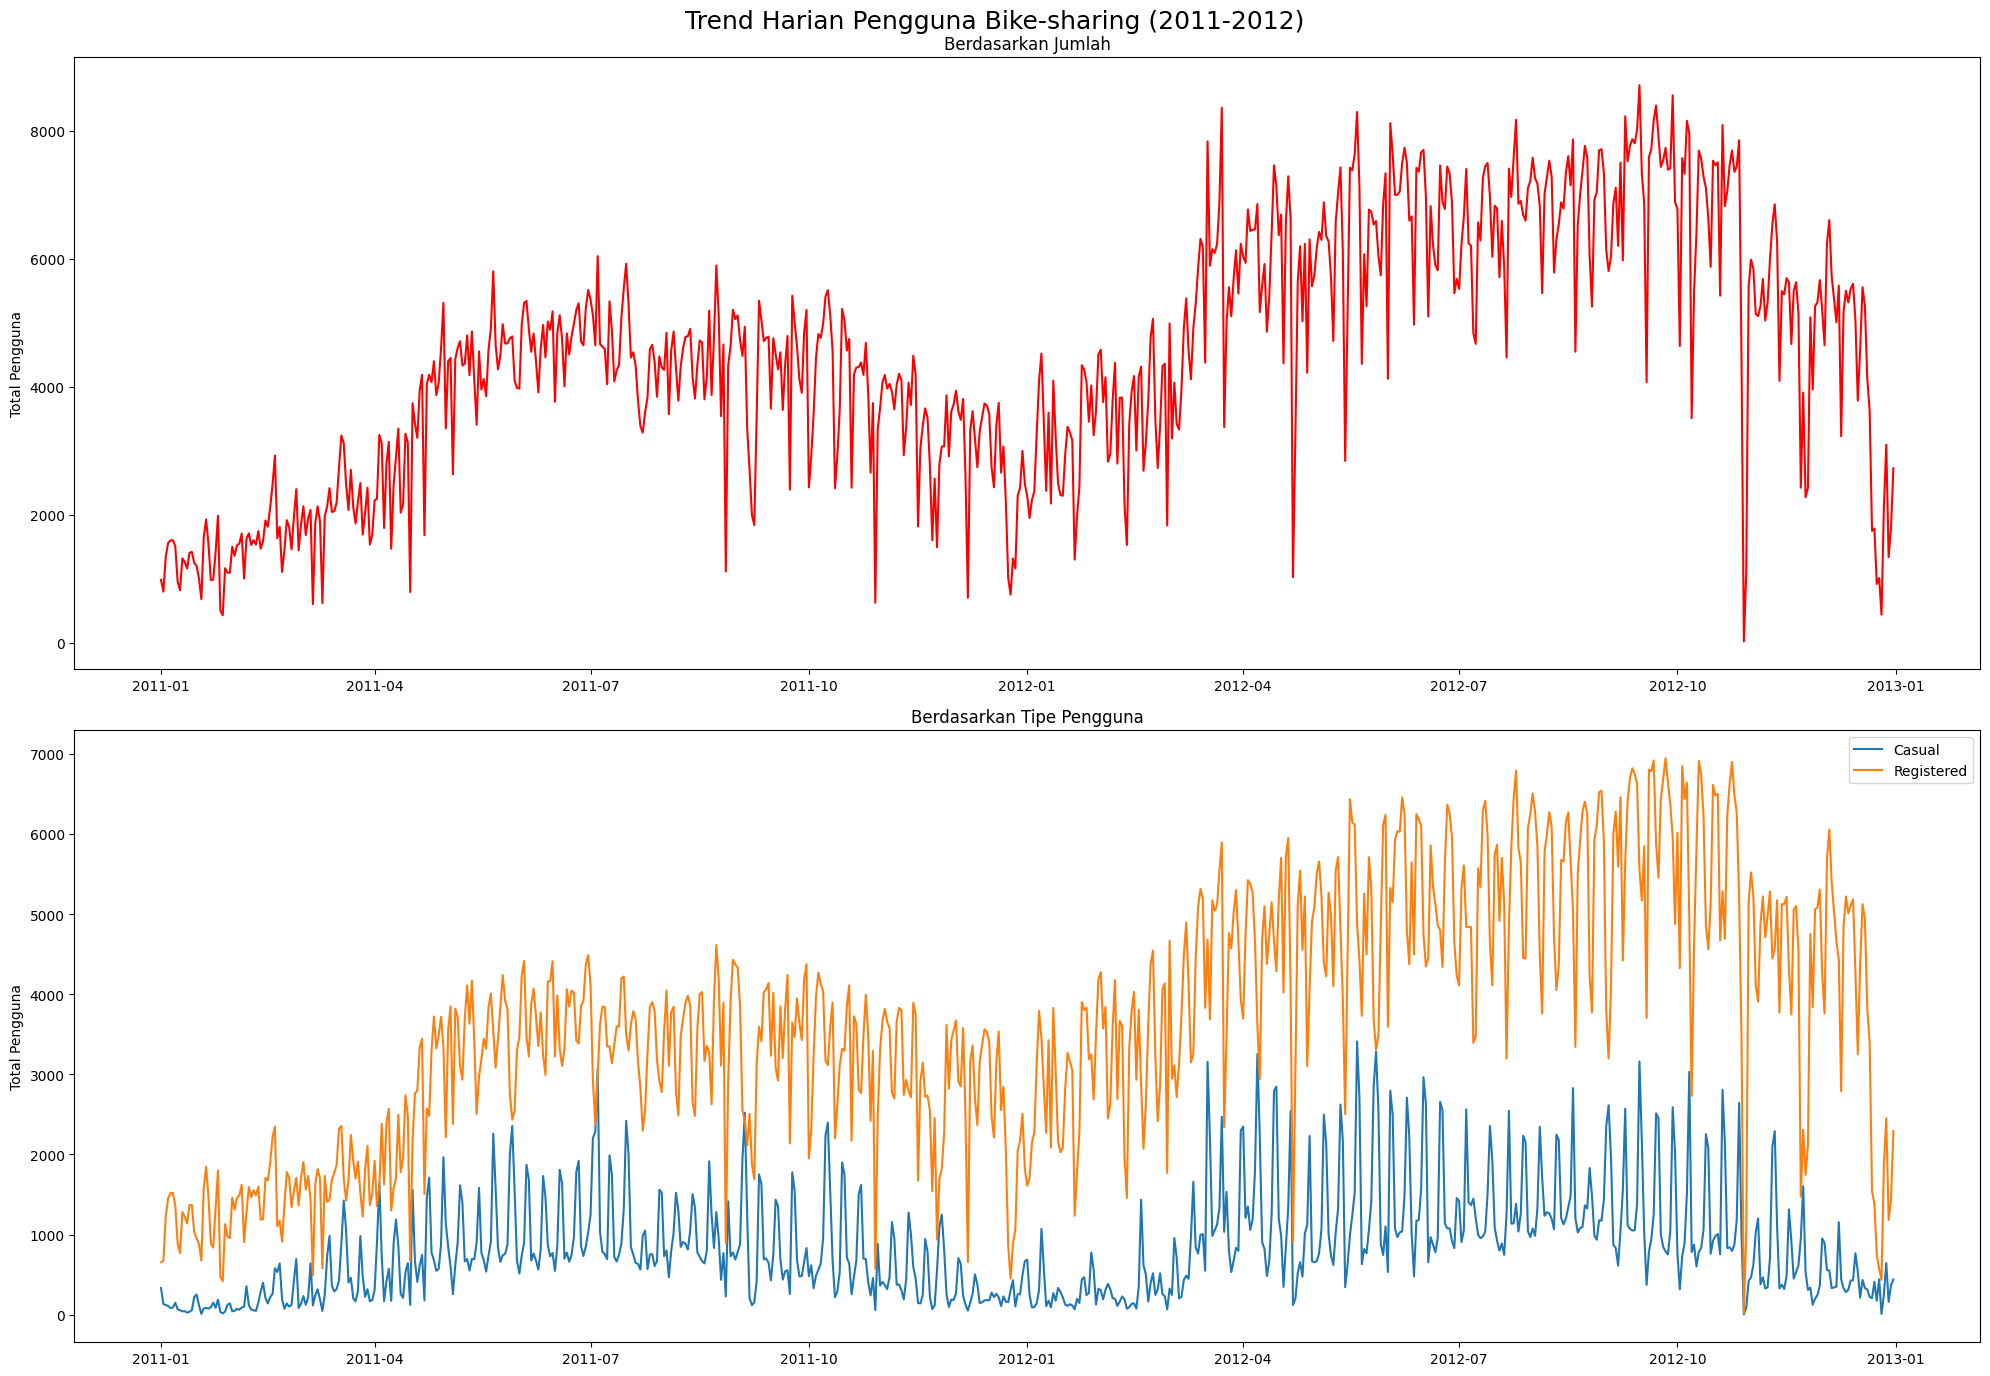

In [26]:
plt.figure(figsize=(20, 14))
plt.suptitle("Trend Harian Pengguna Bike-sharing (2011-2012)", fontsize=18)

plt.subplot(2, 1, 1)
sns.lineplot(
    x="dateday",
    y="count",
    data=day_df,
    color="red",
)
plt.title("Berdasarkan Jumlah")
plt.xlabel(None)
plt.ylabel("Total Pengguna")

plt.subplot(2, 1, 2)
sns.lineplot(
    x="dateday",
    y="casual",
    data=day_df,
    label="Casual",
)
sns.lineplot(
    x="dateday",
    y="registered",
    data=day_df,
    label="Registered",
)
plt.title("Berdasarkan Tipe Pengguna")
plt.xlabel(None)
plt.ylabel("Total Pengguna")

plt.tight_layout()
plt.show()

In [27]:
monthly_users = day_df.resample(rule="M", on="dateday").agg(
    {
        "casual": "sum",
        "registered": "sum",
        "count": "sum",
    }
)
monthly_users.index = monthly_users.index.strftime("%b-%y")

monthly_users.head()

,casual,registered,count
dateday,,,
Jan-11,3073,35116,38189
Feb-11,6242,41973,48215
Mar-11,12826,51219,64045
Apr-11,22346,72524,94870
May-11,31050,104771,135821


In [28]:
monthly_users = monthly_users.reset_index()
monthly_users = monthly_users.rename(columns={"dateday": "month-year"})

monthly_users.head()

,month-year,casual,registered,count
0,Jan-11,3073,35116,38189
1,Feb-11,6242,41973,48215
2,Mar-11,12826,51219,64045
3,Apr-11,22346,72524,94870
4,May-11,31050,104771,135821


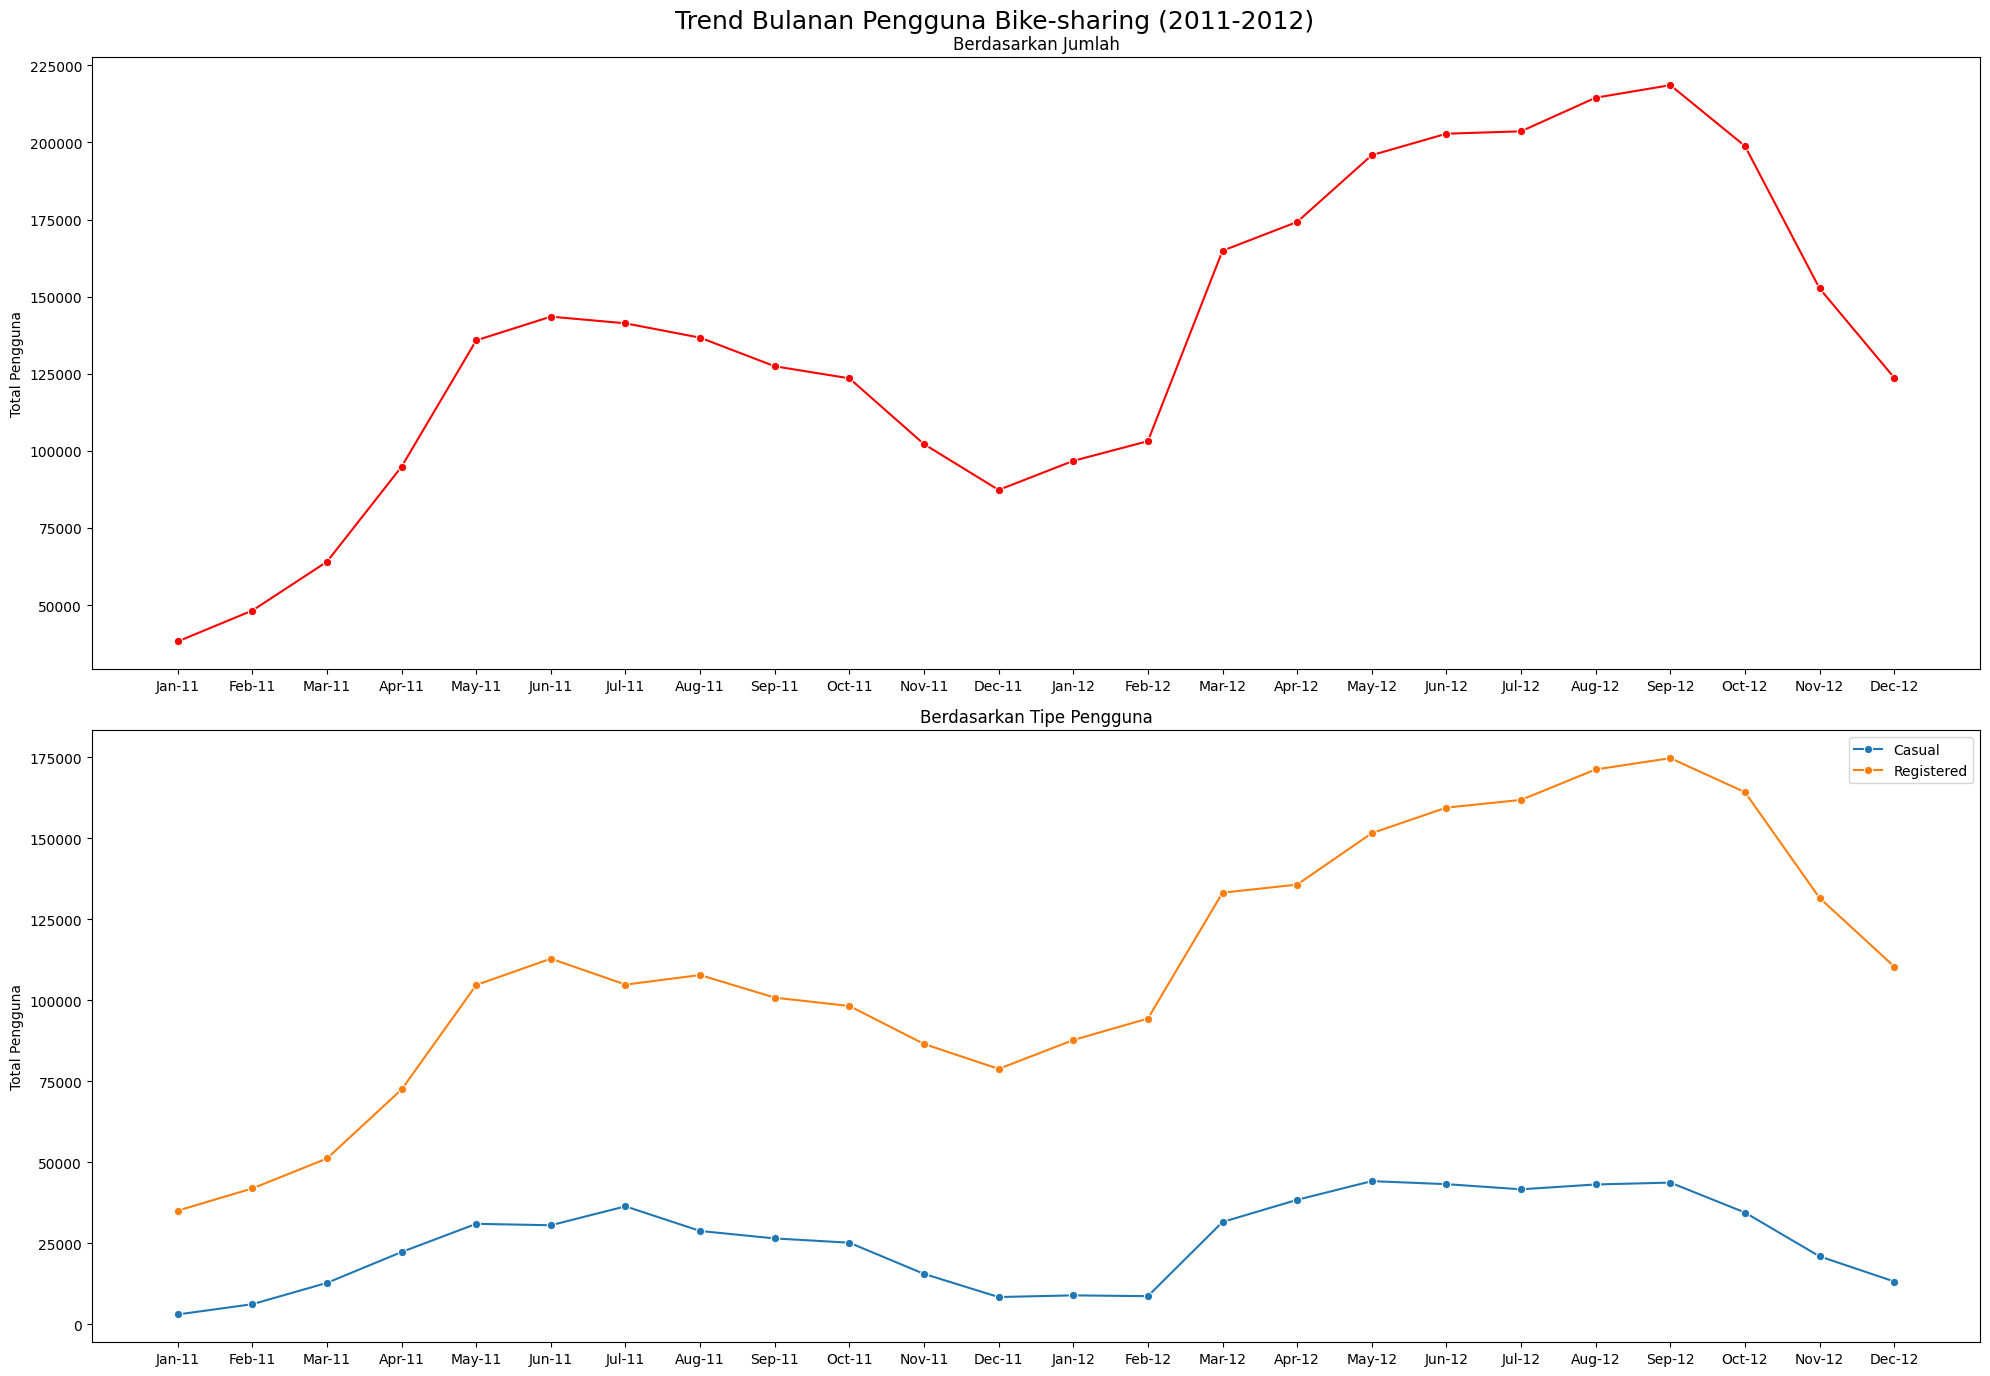

In [29]:
plt.figure(figsize=(20, 14))
plt.suptitle("Trend Bulanan Pengguna Bike-sharing (2011-2012)", fontsize=18)

plt.subplot(2, 1, 1)
sns.lineplot(
    x="month-year",
    y="count",
    data=monthly_users,
    marker="o",
    color="red",
)
plt.title("Berdasarkan Jumlah")
plt.xlabel(None)
plt.ylabel("Total Pengguna")

plt.subplot(2, 1, 2)
sns.lineplot(
    x="month-year",
    y="casual",
    data=monthly_users,
    marker="o",
    label="Casual",
)
sns.lineplot(
    x="month-year",
    y="registered",
    data=monthly_users,
    marker="o",
    label="Registered",
)
plt.title("Berdasarkan Tipe Pengguna")
plt.xlabel(None)
plt.ylabel("Total Pengguna")

plt.tight_layout()
plt.show()

- Jumlah pengguna bike-sharing mengalami **peningkatan pada tahun 2012 dibandingkan tahun 2011**, khususnya di kalangan pengguna tipe `registered`.
- Meskipun kedua jenis pengguna menunjukkan peningkatan, pengguna jenis `registered` secara signifikan mengungguli pengguna jenis `casual` dalam hal kuantitas/jumalah dalam 2 tahun terakhir.

### 3. Bagaimana pola penggunaan layanan penyewaan sepeda berdasarkan hari dalam satu minggu?

In [30]:
users_by_weekday = users_by_weekday.reset_index()

users_by_weekday

,weekday,casual,registered,count
0,Friday,78238,409552,487790
1,Monday,70784,384719,455503
2,Saturday,153852,323955,477807
3,Sunday,140521,303506,444027
4,Thursday,61460,423935,485395
5,Tuesday,57843,411266,469109
6,Wednesday,57319,415729,473048


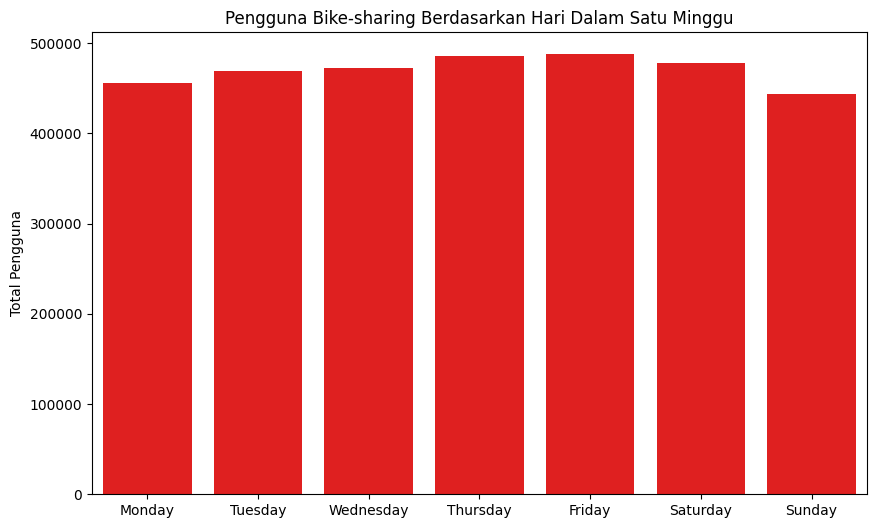

In [31]:
day_order = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]

plt.figure(figsize=(10, 6))

sns.barplot(
    x="weekday",
    y="count",
    data=users_by_weekday,
    order=day_order,
    color="red",
)
plt.title("Pengguna Bike-sharing Berdasarkan Hari Dalam Satu Minggu")
plt.xlabel(None)
plt.ylabel("Total Pengguna")
plt.show()

In [32]:
users_by_weekday_unpivoted = pd.melt(
    users_by_weekday,
    id_vars=["weekday"],
    value_vars=["casual", "registered"],
    var_name="type",
)

users_by_weekday_unpivoted

,weekday,type,value
0,Friday,casual,78238
1,Monday,casual,70784
2,Saturday,casual,153852
3,Sunday,casual,140521
4,Thursday,casual,61460
5,Tuesday,casual,57843
6,Wednesday,casual,57319
7,Friday,registered,409552
8,Monday,registered,384719
9,Saturday,registered,323955


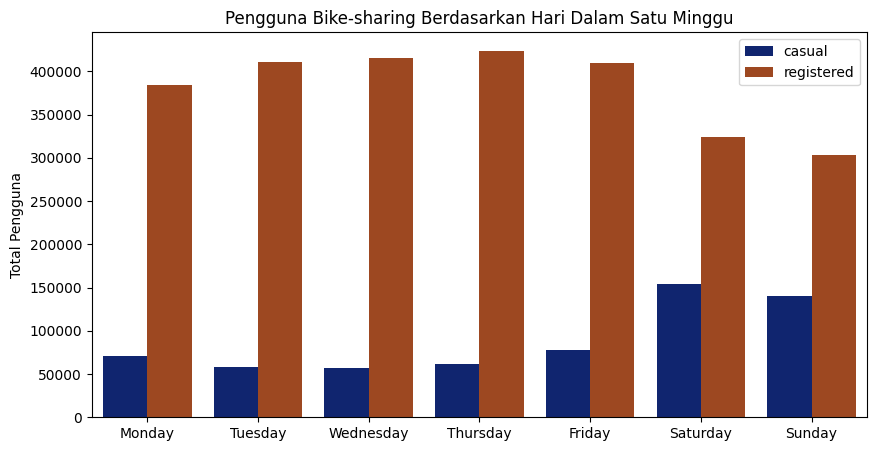

In [33]:
plt.figure(figsize=(10, 5))

sns.barplot(
    x="weekday",
    y="value",
    hue="type",
    data=users_by_weekday_unpivoted,
    order=day_order,
    palette="dark",
)
plt.title("Pengguna Bike-sharing Berdasarkan Hari Dalam Satu Minggu")
plt.xlabel(None)
plt.ylabel("Total Pengguna")
plt.legend(loc="upper right")
plt.show()

- Data Visualisasi pengguna bike-sharing berdasarkan `hari kerja` menunjukkan **nilai konstan** untuk setiap hari.
- Namun, jika dilihat berdasarkan jenis pengguna, pengguna `registered` cenderung **lebih tinggi pada hari kerja**, sedangkan pengguna `casual` cenderung **lebih tinggi pada akhir pekan**.
- Data Visualisasi pengguna bike-sharing berdasarkan `hari kerja`, yang menunjukkan bahwa pada hari kerja, jumlah pengguna **jauh lebih tinggi**.

## Conclusion

### 1. Bagaimana perbandingan jumlah penyewa sepeda antara tipe pengguna casual dan pengguna registered?

Jumlah pengguna bike-sharing `registered`, berjumlah 2,6 juta, **jauh lebih tinggi** dibandingkan dengan pengguna `casual`, yang hanya berjumlah 600 ribu. Hal ini menunjukkan perbedaan yang besar.

### 2. Bagaimana trend penyewaan sepeda dalam 2 tahun terakhir?

Dalam 2 tahun terakhir (2011-2012), terjadi **pertumbuhan secara keseluruhan** dalam jumlah pengguna bike-sharing. Peningkatan ini terutama terlihat di pengguna jenis `registered`. Secara signifikan, pengguna jenis `registered` mengungguli pengguna jenis `casual` dalam hal kuantitas/jumlah, sehingga menunjukkan peningkatan untuk kedua jenis pengguna.

### 3. Bagaimana pola penggunaan layanan penyewaan sepeda berdasarkan hari dalam satu minggu?

Pola pengguna bike-sharing berdasarkan hari dalam seminggu menunjukkan **jumlah yang konsisten di sekitar 400.000** pengguna setiap hari. Namun, jika dilihat lebih dekat berdasarkan jenis pengguna menunjukkan bahwa pengguna jenis `registered` cenderung **lebih tinggi pada hari kerja**, sedangkan pengguna jenis `casual` menunjukkan **penggunaan lebih tinggi pada akhir pekan**.

In [34]:
day_df.to_csv("hari.csv", index=False)
hour_df.to_csv("jam.csv", index=False)